<a href="https://colab.research.google.com/github/sachinkun21/PyTorch/blob/master/Use_Case_2_Object_Image_Classification_using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

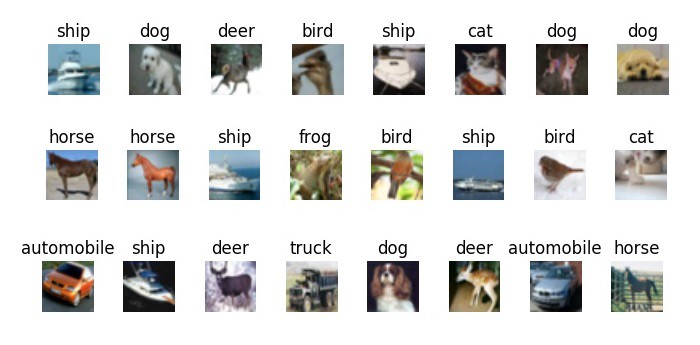

Let’s take things up a notch.

In this use case, we will create convolutional neural network (CNN) architectures in PyTorch. We will perform object image classification using the popular CIFAR-10 dataset. This dataset is also included in the torchvision package. The entire procedure to define and train the model will remain the same as the previous use case, except the introduction of additional layers in the network.

Let’s load and transform the dataset:

In [0]:
from torchvision import transforms
_tasks = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                              ])

In [2]:
# load the dataset 
from torchvision.datasets import CIFAR10
cifar = CIFAR10('data', train=True, download=True, transform=_tasks)

0it [00:00, ?it/s]

170500096it [00:04, 41023236.05it/s]                               


Extracting data/cifar-10-python.tar.gz to data


In [0]:
# create training and validation split 
split = int(0.8 * len(cifar))
index_list = list(range(len(cifar)))
train_idx, valid_idx = index_list[:split], index_list[split:]

In [0]:
# Creating Training and Validation split

split = int(0.8*len(cifar))
index_list = list(range(len(cifar)))
train_idx, valid_idx = index_list[:split], index_list[split:]



In [0]:
# Creating training and validation sampler objects
from torch.utils.data.sampler import SubsetRandomSampler
tr_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(valid_idx)

In [0]:
# Creating iterator objects using sampler Objects
from torch.utils.data import DataLoader
train_loader = DataLoader(cifar , batch_size = 256 , sampler = tr_sampler)
valid_loader = DataLoader(cifar , batch_size = 256 , sampler = val_sampler)


We will create the architecture with three convolutional layers for low-level feature extraction, three pooling layers for maximum information extraction,and two linear layers for linear classification


In [0]:
import torch.nn.functional as F
import torch.nn as nn

In [0]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()

    # defining the layers
    self.conv1 = nn.Conv2d(3, 16, 3, padding = 1)
    self.conv2 = nn.Conv2d(16, 32, 3, padding =1 )
    self.conv3 = nn.Conv2d(32, 64, 3 , padding =1 )
    self.pool = nn.MaxPool2d(2,2)
    self.linear1 = nn.Linear(1024,512)
    self.linear2 = nn.Linear(512, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1 , 1024) # Reshaping
    x = F.relu(self.linear1(x))
    x = self.linear2(x)

    return x
  

model = Model()

Let's Define the Loss Function and Optimizer

In [0]:
import torch.optim as optim
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01 ,weight_decay =  1e-6, momentum = 0.9 , nesterov = True)

In [10]:
# let's run it for 10 epochs
import numpy as np
for epoch in range(2):
  train_loss,valid_loss = [], []

  # training 
  model.train()
  print("Training")

  for data, target in train_loader:
    optimizer.zero_grad()
    output = model(data)
    loss = loss_function(output , target)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())
    print("Loss", loss.item())


    # Evaluation 
    model.eval()
    for data, target in valid_loader:
      output  = model(data)
      loss = loss_function(output, target)
      valid_loss.append(loss.item())
  print("Epoch:", epoch+1, "Training Loss: ", np.mean(train_loss), "Valid Loss: ", np.mean(valid_loss))

Training
Loss 2.3035950660705566
Loss 2.3008615970611572
Loss 2.3012478351593018
Loss 2.303405523300171
Loss 2.303464889526367
Loss 2.303785800933838
Loss 2.301996946334839
Loss 2.3018958568573
Loss 2.3009142875671387
Loss 2.3026413917541504
Loss 2.300222635269165
Loss 2.3027496337890625
Loss 2.300957679748535
Loss 2.3030283451080322
Loss 2.3020641803741455
Loss 2.2988548278808594
Loss 2.3018131256103516
Loss 2.3004610538482666
Loss 2.303008794784546
Loss 2.301415205001831
Loss 2.3020834922790527
Loss 2.301159381866455
Loss 2.299196720123291
Loss 2.3003578186035156
Loss 2.300551652908325
Loss 2.2985098361968994
Loss 2.3000407218933105
Loss 2.2982683181762695
Loss 2.297767400741577
Loss 2.2996420860290527
Loss 2.2976279258728027
Loss 2.299997329711914
Loss 2.297267436981201
Loss 2.2967801094055176
Loss 2.297487497329712
Loss 2.2967653274536133
Loss 2.2961525917053223
Loss 2.2965376377105713
Loss 2.2957236766815186
Loss 2.297048330307007
Loss 2.2962467670440674
Loss 2.2962870597839355
Lo

Once the model is trained, we can generate predictions on the validation set.

In [0]:
# dataloader for validation dataset
dataiter = iter(valid_loader)
data, labels = dataiter.next()
output = model(data)


In [0]:
import torch
_, preds_tensor = torch.max(output , 1)
preds  = np.squeeze(preds_tensor.numpy())

In [14]:
print ("Actual:", labels[:10])
print ("Predicted:", preds[:10])

Actual: tensor([3, 9, 9, 9, 7, 8, 1, 4, 9, 5])
Predicted: [5 9 1 9 4 1 9 0 9 6]


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(labels,preds)

0.4609375